# Ensemble Learning and Random Forests

## Voting Classifiers

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [3]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

In [4]:
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard'
)

In [5]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [6]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f'{clf.__class__.__name__}: {accuracy_score(y_test, y_pred)}')

LogisticRegression: 0.864
RandomForestClassifier: 0.888
SVC: 0.896
VotingClassifier: 0.904


In [7]:
svm_clf = SVC(probability=True)
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft'
)

In [8]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f'{clf.__class__.__name__}: {accuracy_score(y_test, y_pred)}')


LogisticRegression: 0.864
RandomForestClassifier: 0.896
SVC: 0.896
VotingClassifier: 0.904


## Bagging and Pasting

In [9]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [10]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1
)

In [11]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

In [12]:
y_pred = bag_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.912


## Out-of-Bag evaluation

In [13]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True
)

In [14]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500,
                  n_jobs=-1, oob_score=True)

In [15]:
bag_clf.oob_score_

0.9013333333333333

In [16]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.896

## Random Forests

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

In [18]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [19]:
y_pred_rf = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.92

In [20]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter='random', max_leaf_nodes=16),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1
)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_leaf_nodes=16,
                                                        splitter='random'),
                  n_estimators=500, n_jobs=-1)

In [21]:
y_pred_bg = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred_bg)

0.912

### Feature Importance

In [22]:
iris = load_iris()

In [23]:
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris['data'], iris['target'])

RandomForestClassifier(n_estimators=500, n_jobs=-1)

In [24]:
for name, score in zip(iris['feature_names'], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.09525770614043763
sepal width (cm) 0.02192721657863215
petal length (cm) 0.45882645500097635
petal width (cm) 0.42398862227995393


## Boosting

In [25]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import xgboost

### AdaBoost

In [26]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm='SAMME.R', learning_rate=0.5
)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

In [27]:
y_pred_ada = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred_ada)

0.896

### Gradient Boosting

In [28]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0] ** 2 + 0.05 * np.random.randn(100)

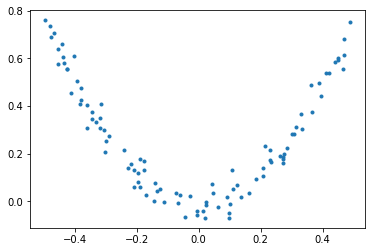

In [29]:
plt.plot(X, y, '.')

In [30]:
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2)

In [31]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2)

In [32]:
y3 = y2 - tree_reg1.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y2)

DecisionTreeRegressor(max_depth=2)

In [33]:
X_new = np.array([[0.8]])
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
print(y_pred)

[0.60839441]


In [34]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1, max_depth=2, n_estimators=3)

In [35]:
gbrt.predict(X_new)

array([0.75026781])

In [36]:
X_train, X_val, y_train, y_val = train_test_split(X, y)

In [37]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=120)

In [38]:
errors = [
    mean_squared_error(y_val, y_pred)
    for y_pred in gbrt.staged_predict(X_val)
]

(0.0, 0.02)

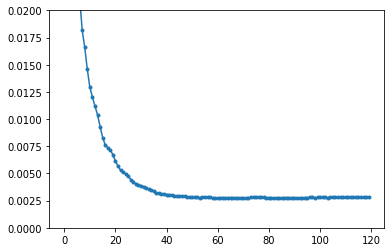

In [39]:
plt.plot(errors, '.-')
plt.ylim(0, 0.02)

In [40]:
bst_n_estimators = np.argmin(errors) + 1
bst_n_estimators

85

In [41]:
gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)


GradientBoostingRegressor(max_depth=2, n_estimators=85)

In [42]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)

In [43]:
min_val_error = float('inf')
error_going_up = 0

for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break


In [44]:
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)
print(mean_squared_error(y_val, y_pred))

0.003684854933316534


In [45]:
xgb_reg.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)], early_stopping_rounds=2
)

[0]	validation_0-rmse:0.22055
[1]	validation_0-rmse:0.16547
[2]	validation_0-rmse:0.12243
[3]	validation_0-rmse:0.10044
[4]	validation_0-rmse:0.08467
[5]	validation_0-rmse:0.07344
[6]	validation_0-rmse:0.06728
[7]	validation_0-rmse:0.06383
[8]	validation_0-rmse:0.06125
[9]	validation_0-rmse:0.05959
[10]	validation_0-rmse:0.05902
[11]	validation_0-rmse:0.05852
[12]	validation_0-rmse:0.05844
[13]	validation_0-rmse:0.05801
[14]	validation_0-rmse:0.05747
[15]	validation_0-rmse:0.05772


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
y_pred = xgb_reg.predict(X_val)
print(mean_squared_error(y_val, y_pred))


0.0033024085351185672
